In [1]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/107.7 GB disk)


In [3]:
from ultralytics import YOLO


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [9]:
!pip install roboflow

from roboflow import Roboflow

In [11]:

rf = Roboflow(api_key="mzXnPIRMH8iwvOgX9YZq")
project = rf.workspace("farzad").project("pothole_segmentation_yolov8")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole_Segmentation_YOLOv8-1 in yolov8:: 100%|██████████| 1569/1569 [00:00<00:00, 5825.89it/s]


In [14]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 6.25M/6.25M [00:00<00:00, 294MB/s]
New https://pypi.org/project/ultralytics/8.3.204 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Pothole_Segmentation_YOLOv8-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

In [15]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Pothole_Segmentation_YOLOv8-1/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:19<00:00,  4.83s/it]
                   all         60        201      0.767      0.632      0.749      0.431
Speed: 9.3ms preprocess, 296.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val



0: 480x640 2 Potholes, 169.7ms
Speed: 3.9ms preprocess, 169.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


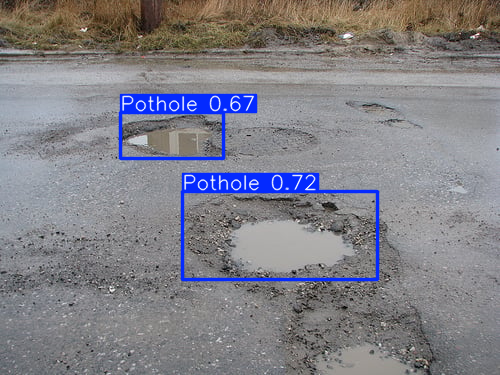

Prediction saved to /content/predictions/prediction_0.jpg


In [25]:
from ultralytics import YOLO
import requests
from PIL import Image
import io
import os

# Load the trained model
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# Define the image URL
image_url = 'https://www.wolfpaving.com/hs-fs/hub/98698/file-16089009.jpg?width=531&name=file-16089009.jpg'

# Download and open the image using PIL
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
image = Image.open(io.BytesIO(response.content))

# Perform prediction
results = model.predict(image)

# Display and save the results
for i, r in enumerate(results):
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)

    # Save the image
    save_dir = os.path.join(HOME, "predictions")
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"prediction_{i}.jpg")
    im.save(save_path)
    print(f"Prediction saved to {save_path}")